# Artificial intelligence application : Storms in Nebraska

## Data Information and Quick Analysis

In [20]:
# Used Library # 
import numpy as np
import pandas as pd
import folium
import branca.colormap as cm
import branca
from ipywidgets import interact, IntSlider
from folium.plugins import MeasureControl
from branca.colormap import LinearColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import IsolationForest
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from folium.plugins import HeatMap
import branca.colormap as cm

In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/TheYoanel/Artificial-intelligence-application-Storms-in-Nebraska/main/1950-2021_all_tornadoes.csv'
data = pd.read_csv(url, encoding='utf-8').rename(columns={'yr':'Year','mo':'Month','dy':'Day','fat':'Fatalities','loss':'Property Losses','inj':'Injuries','mag':'Magnitude','closs':'Crop Loss','st':'State'})

ne_data = data[data['State'].str.contains('NE')]
ne_data = ne_data.query('Magnitude >= 0')


In [8]:
# Let's see if it's went well ! #
ne_data.head()

,om,Year,Month,Day,date,time,tz,State,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
92,109,1950,5,18,1950-05-18,15:15:00,3,NE,31,2,...,0.7,333,1,1,1,145,0,0,0,0
136,92,1950,5,8,1950-05-08,22:10:00,3,NE,31,1,...,8.8,467,1,1,1,127,0,0,0,0
141,137,1950,6,13,1950-06-13,17:30:00,3,NE,31,3,...,4.1,10,1,1,1,107,0,0,0,0
149,145,1950,6,22,1950-06-22,21:00:00,3,NE,31,4,...,1.9,10,1,1,1,129,0,0,0,0
170,164,1950,7,15,1950-07-15,17:30:00,3,NE,31,5,...,10.0,440,1,1,1,21,0,0,0,0


In [9]:
# For the one who want information about the data.
ne_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 92 to 68438
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   om               2980 non-null   int64  
 1   Year             2980 non-null   int64  
 2   Month            2980 non-null   int64  
 3   Day              2980 non-null   int64  
 4   date             2980 non-null   object 
 5   time             2980 non-null   object 
 6   tz               2980 non-null   int64  
 7   State            2980 non-null   object 
 8   stf              2980 non-null   int64  
 9   stn              2980 non-null   int64  
 10  Magnitude        2980 non-null   int64  
 11  Injuries         2980 non-null   int64  
 12  Fatalities       2980 non-null   int64  
 13  Property Losses  2980 non-null   float64
 14  Crop Loss        2980 non-null   float64
 15  slat             2980 non-null   float64
 16  slon             2980 non-null   float64
 17  elat        

In [10]:
ne_data.describe()

,om,Year,Month,Day,tz,stf,stn,Magnitude,Injuries,Fatalities,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
count,2980.000000,2980.000000,2980.000000,2980.000000,2980.0,2980.0,2980.000000,2980.000000,2980.000000,2980.000000,...,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000
mean,73322.429866,1988.776174,5.979530,15.732215,3.0,31.0,23.546309,0.679195,0.433221,0.020134,...,4.001268,86.085906,1.015772,0.992282,0.980872,89.126846,7.387919,2.102013,0.871477,0.073154
std,184326.710762,18.942057,1.552457,8.474599,0.0,0.0,22.013458,0.897071,4.654844,0.301497,...,10.834224,220.556521,0.124612,0.087528,0.559309,52.946248,29.253448,16.047063,11.140920,0.260433
min,3.000000,1950.000000,1.000000,1.000000,3.0,31.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,315.000000,1974.750000,5.000000,8.000000,3.0,31.0,5.000000,0.000000,0.000000,0.000000,...,0.100000,10.000000,1.000000,1.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000
50%,511.000000,1992.000000,6.000000,16.000000,3.0,31.0,18.000000,0.000000,0.000000,0.000000,...,0.500000,25.000000,1.000000,1.000000,1.000000,89.000000,0.000000,0.000000,0.000000,0.000000
75%,883.000000,2004.000000,7.000000,23.000000,3.0,31.0,36.000000,1.000000,0.000000,0.000000,...,2.500000,50.000000,1.000000,1.000000,1.000000,135.000000,0.000000,0.000000,0.000000,0.000000
max,620823.000000,2021.000000,12.000000,31.000000,3.0,31.0,112.000000,5.000000,133.000000,11.000000,...,176.400000,4400.000000,2.000000,1.000000,2.000000,185.000000,185.000000,183.000000,185.000000,1.000000


## Plotting history of Nebraska tornadoes.

In [11]:
# Create a map centered on Nebraska
nebraska_coords = [41.5, -99.5]
ne_map = folium.Map(location=nebraska_coords, zoom_start=7)
# Create the colormap for the markers
colormap = cm.LinearColormap(colors=['#0000ff', '#ff0000'], vmin=0, vmax=1)
# Function to display tornado markers based on the selected year
def display_tornadoes(year):
    ne_map = folium.Map(location=nebraska_coords, zoom_start=7)
    # Remove all previously added circles from the map
    for layer in ne_map._children:
        if layer.startswith('marker'):
            ne_map.remove_layer(ne_map._children[layer])
    # Filter the data based on the year
    year_data = ne_data[ne_data['Year'] == year]
    # Iterating on all the dataframe line
    for index, row in year_data.iterrows():
        # Get the information for each tornado
        lat = row['elat']
        lon = row['elon']
        mag = row['Magnitude'] / 5  # normalise the magnitude
        # Add a marker to the map for each tornado
        folium.Circle(
            [lat, lon],
            popup=f"Magnitude: {row['Magnitude']}, Year: {year}",
            radius=10000 * mag,
            color=None,
            fill=True,
            fill_opacity=0.7,
            fill_color=colormap(mag)
        ).add_to(ne_map)
    # Add the colormap legend to the map
    ne_map.add_child(colormap)
    # Afficher la carte
    return ne_map
# Create a slider for the Year
slider = IntSlider(
    value=1950,
    min=1950,
    max=2021,
    step=1,
    description='Year:',
    readout=True,
    readout_format='d'
)
# Create the interactive map
interact(display_tornadoes, year=slider)

interactive(children=(IntSlider(value=1950, description='Year:', max=2021, min=1950), Output()), _dom_classes=…

<function __main__.display_tornadoes(year)>

### Plotting frequencies heatmap of Nebraska tornadoes

In [12]:
X = ne_data[['elat', 'elon']].dropna()
heatmap_data = [[row['elat'], row['elon']] for index, row in X.iterrows()]
HeatMap(heatmap_data, radius = 9).add_to(ne_map)
ne_map

### Plotting magnitudes heatmap of Nebraska tornadoes

In [13]:
X = ne_data[['elat', 'elon', 'Magnitude']].dropna()
ne_map = folium.Map(location=nebraska_coords, zoom_start=7)
heatmap_data = [[row['elat'], row['elon'], row['Magnitude']] for index, row in X.iterrows()]
HeatMap(heatmap_data, radius=15, max_val=X['Magnitude'].max()).add_to(ne_map)
ne_map

<ipython-input-13-79cc5b0520ad>:4: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heatmap_data, radius=15, max_val=X['Magnitude'].max()).add_to(ne_map)


## Data analysis history with different parametters

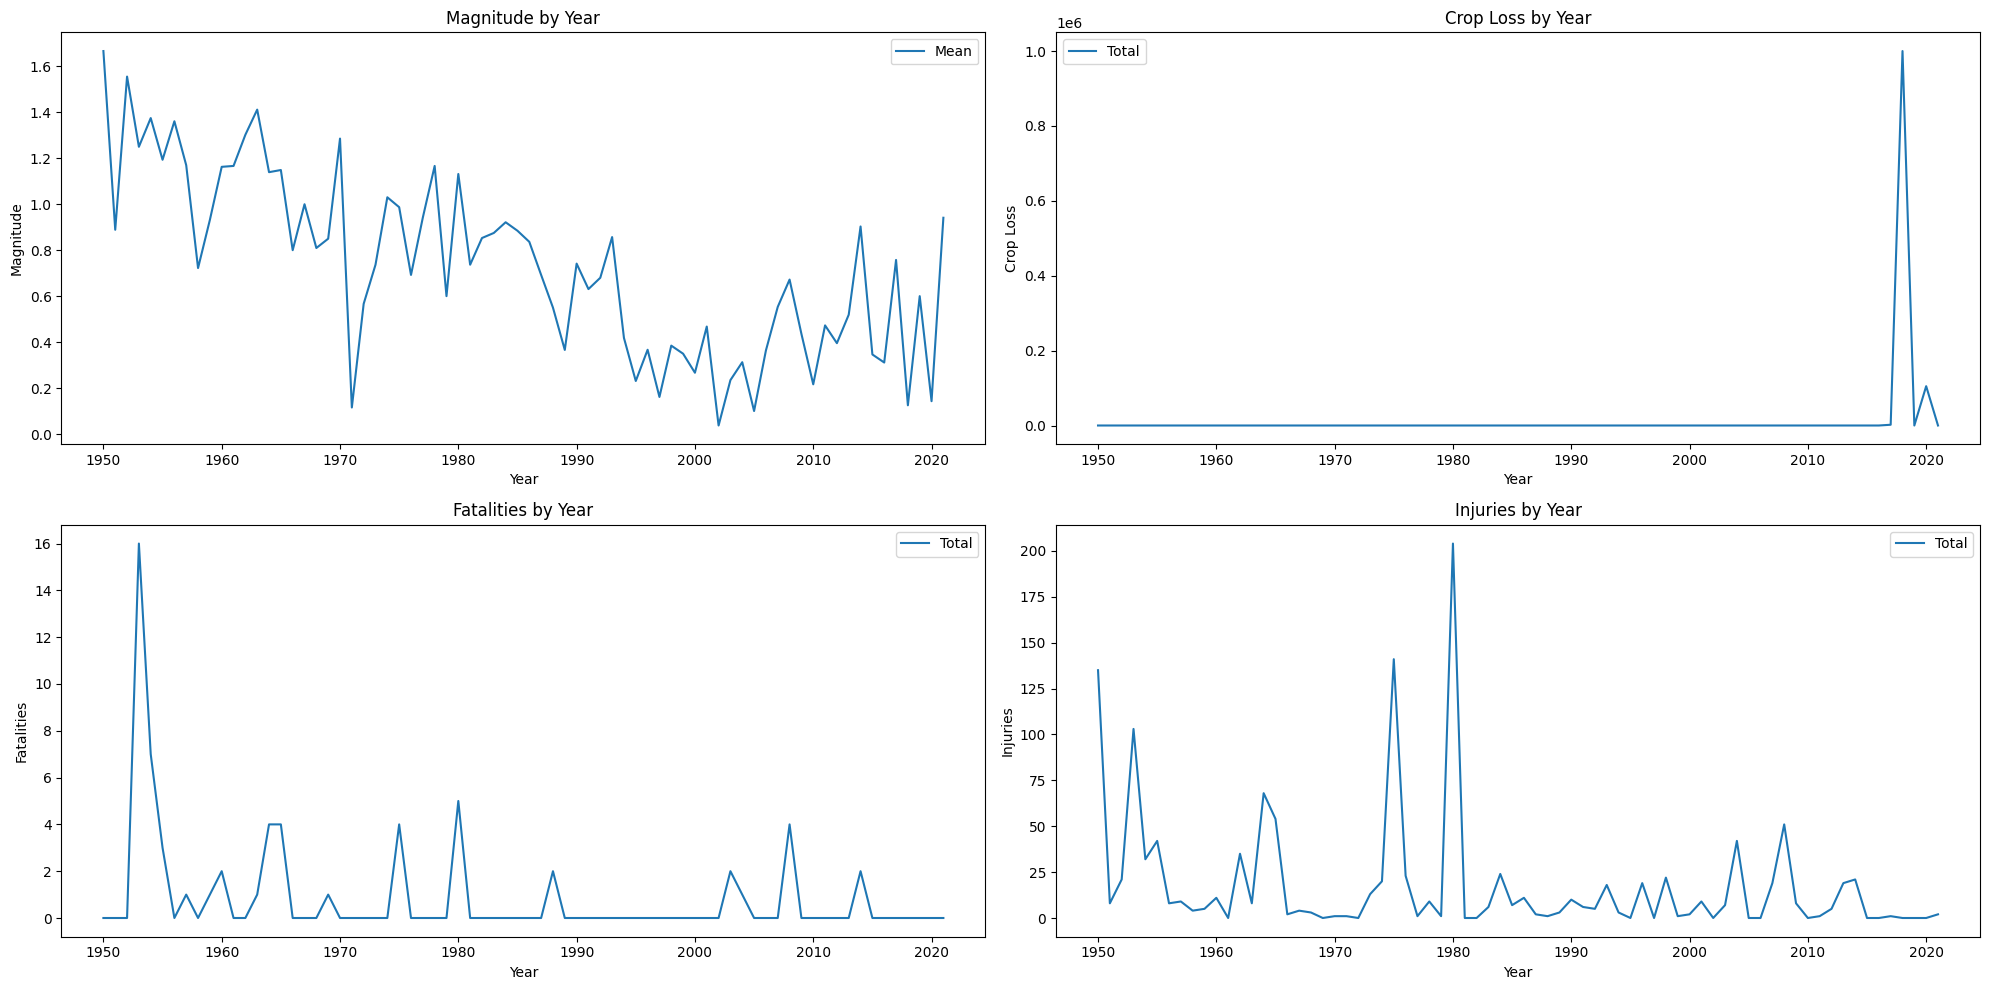

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
variables = ['Magnitude', 'Crop Loss', 'Fatalities', 'Injuries']
for i, var in enumerate(variables):
    ax = axs[i//2, i%2]
    data_by_year = ne_data.groupby('Year')[var]
    if var == 'Magnitude':
        data_by_year = data_by_year.mean()
        ax.plot(data_by_year.index, data_by_year.values, label='Mean')
    else:
        data_by_year = data_by_year.sum()
        ax.plot(data_by_year.index, data_by_year.values, label='Total')
    ax.set_xlabel('Year')
    ax.set_ylabel(var)
    ax.set_title(f'{var} by Year')
    ax.legend()
plt.tight_layout()
plt.show()


## Pivot table to obtain a global view of tornado magnitude over the years and months.

<Axes: xlabel='Year', ylabel='Month'>

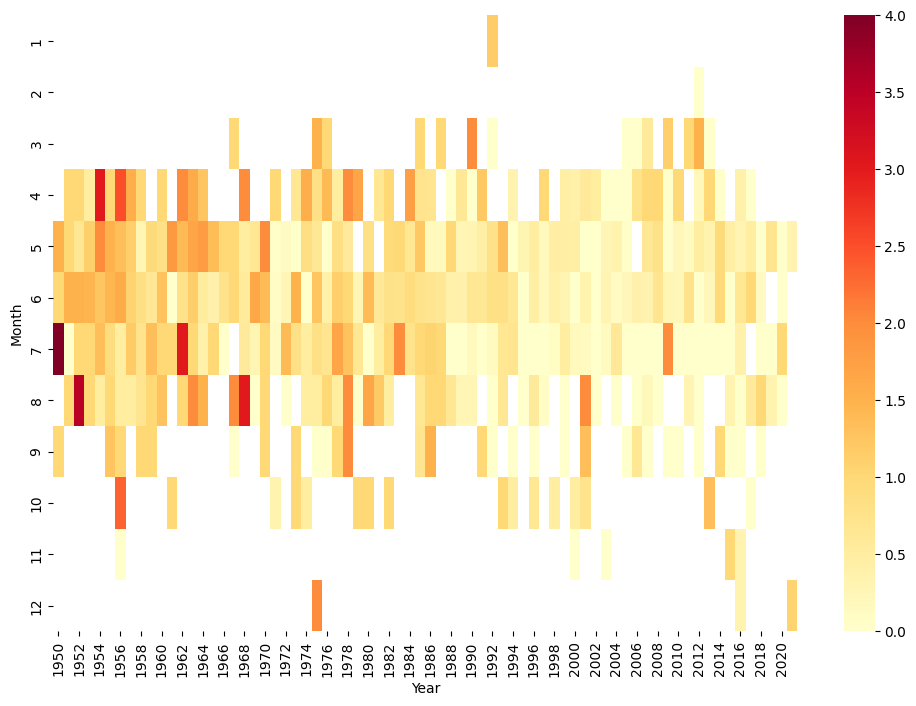

In [17]:
ne_pivot = ne_data.pivot_table(values='Magnitude', index='Month', columns='Year', aggfunc=np.mean)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(ne_pivot, cmap='YlOrRd')

## Correlation matrix to obtain the correlation between the variables in the dataset

<ipython-input-18-3c05cf401421>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ne_data.corr()


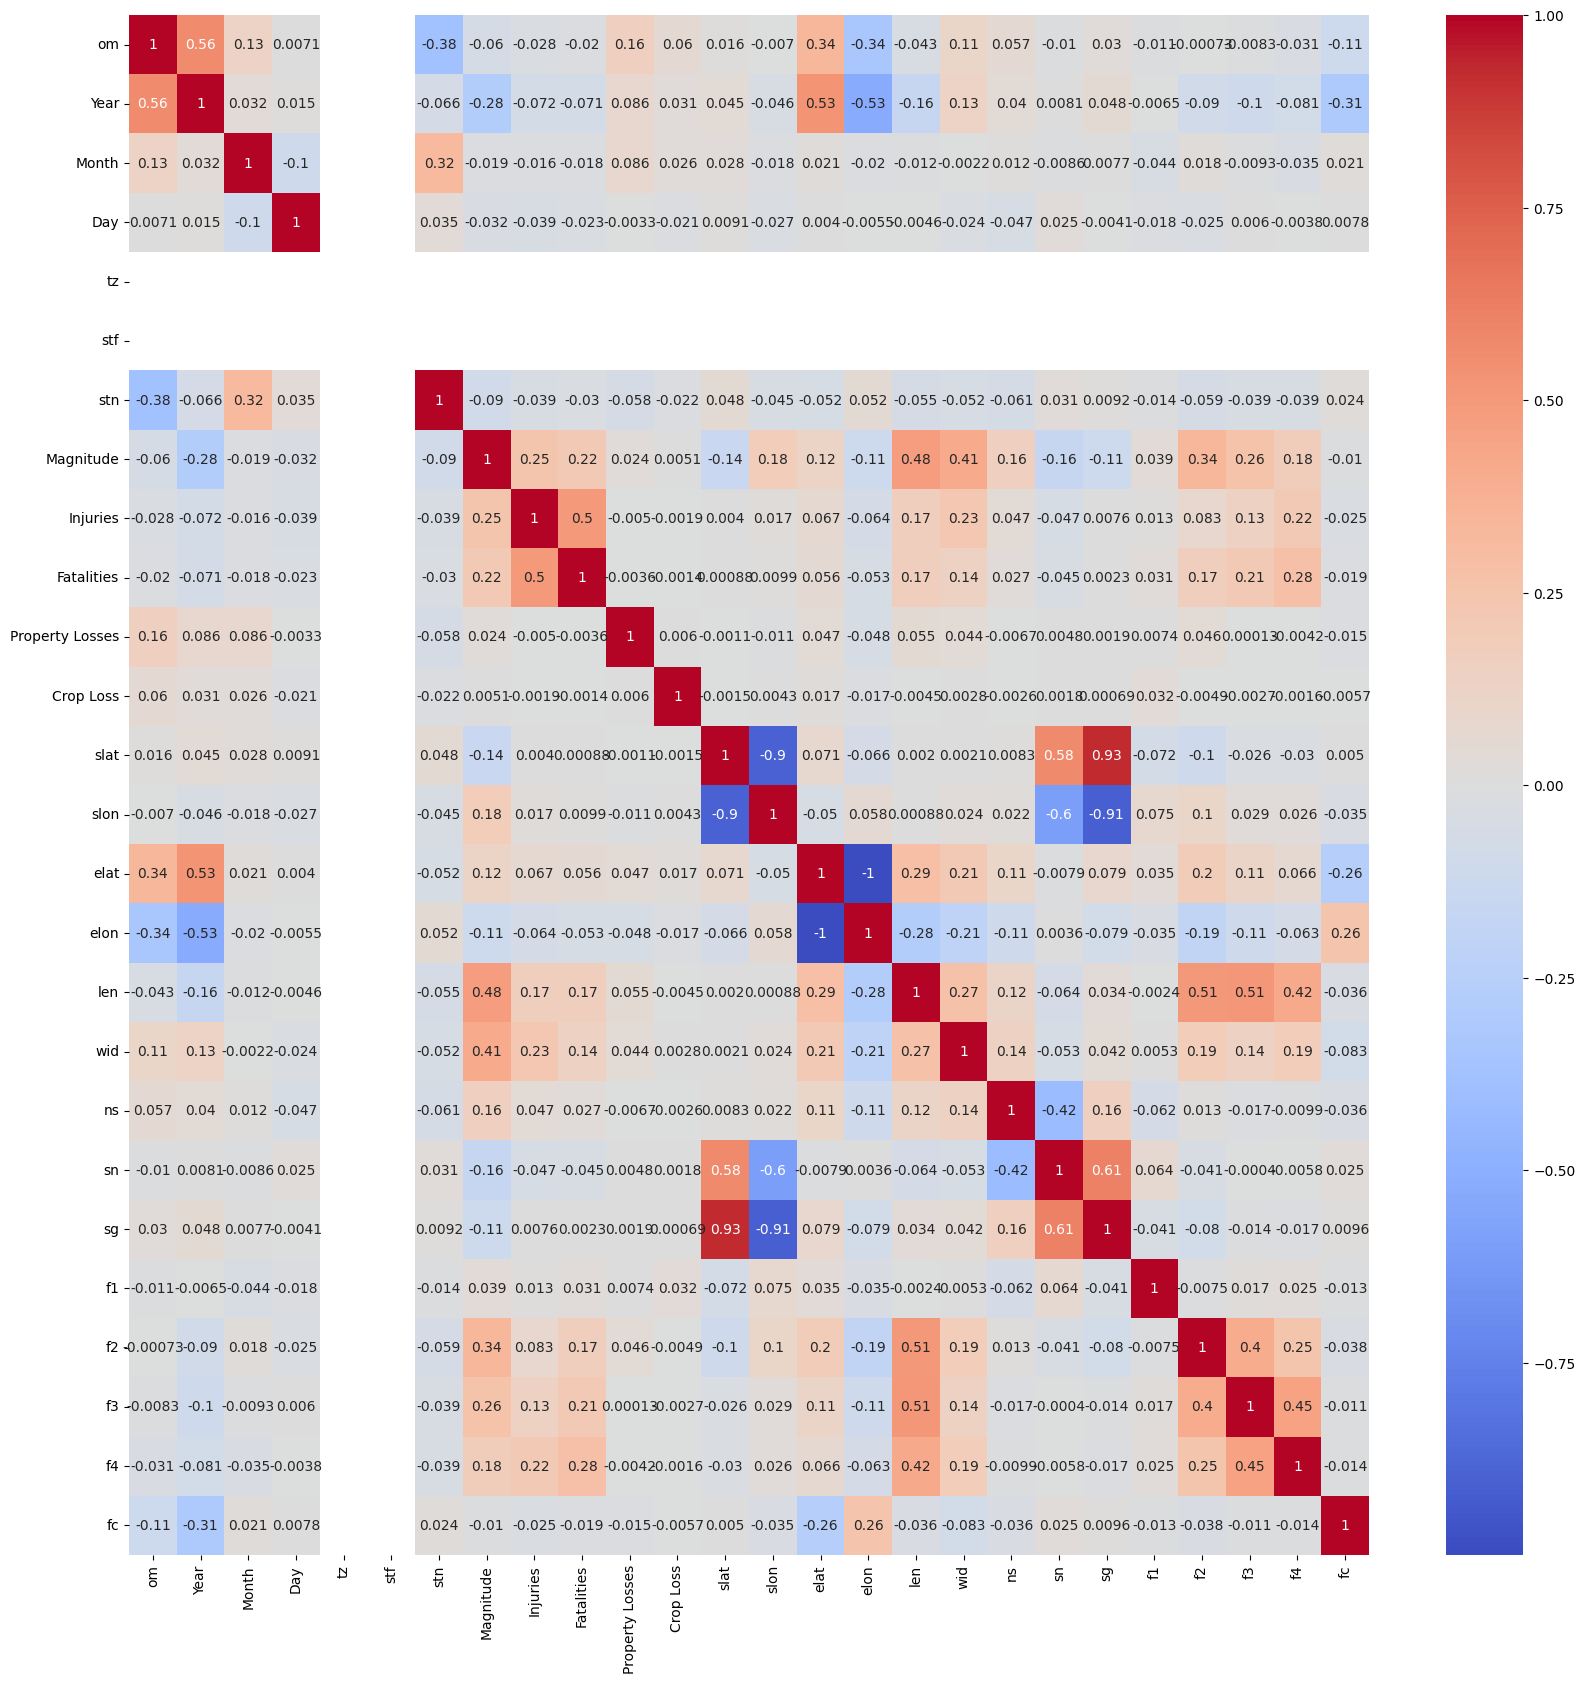

In [18]:
corr_matrix = ne_data.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

## The plot uses the Isolation Forest algorithm to detect anomalies based on three features: latitude, longitude, and magnitude (with the other two features being related to the number of deaths/injuries and money loss). It then creates a map to plot the top 25 anomalies as red markers, along with information about the magnitude and year of occurrence. This helps to identify potential anomalies in tornado data, including the impact of tornadoes in terms of deaths/injuries and monetary losses.

In [47]:
features = ['elat', 'elon', 'Magnitude']
isf = IsolationForest(random_state=0)
isf.fit(ne_data[features])
anomaly_scores = isf.score_samples(ne_data[features])
ne_data['Anomaly Score'] = anomaly_scores*-100
top_anomalies_25 = ne_data.sort_values(by='Anomaly Score', ascending=False).head(25)
print(top_anomalies_25)

ne_map = folium.Map(location=nebraska_coords, zoom_start=7)
for index, row in top_anomalies_25.iterrows():
    lat = row['elat']
    lon = row['elon']
    mag = row['Magnitude'] / 5  # normaliser la magnitude
    folium.Marker(
        location=[lat, lon],
        popup=f"Magnitude: {row['Magnitude']}, Year: {row['Year']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(ne_map)
ne_map

        om  Year  Month  Day        date      time  tz State  stf  stn  ...  \
7751   244  1964      5    5  1964-05-05  18:30:00   3    NE   31   14  ...   
29042   90  1990      3   13  1990-03-13  17:05:00   3    NE   31    3  ...   
8641   273  1965      5    8  1965-05-08  17:30:00   3    NE   31   10  ...   
2343   476  1956     10   29  1956-10-29  16:45:00   3    NE   31   31  ...   
2686   258  1956      6    6  1956-06-06  15:30:00   3    NE   31   10  ...   
32877  277  1993      5    7  1993-05-07  18:50:00   3    NE   31   11  ...   
4149   400  1958      7   18  1958-07-18  22:30:00   3    NE   31   40  ...   
6628   436  1962      6   15  1962-06-15  19:00:00   3    NE   31   34  ...   
15480  308  1974      4   20  1974-04-20  14:10:00   3    NE   31    7  ...   
29506  713  1990      6   15  1990-06-15  18:00:00   3    NE   31   53  ...   
2146   437  1955      6   27  1955-06-27  16:45:00   3    NE   31   13  ...   
6556   298  1962      5   29  1962-05-29  11:40:00  

In [51]:
features_death = ['elat', 'elon', 'Magnitude', 'Injuries', 'Fatalities']
isf.fit(ne_data[features_death])
anomaly_scores = isf.score_samples(ne_data[features_death])
ne_data['Anomaly Score'] = anomaly_scores*-100
top_anomalies_25_death = ne_data.sort_values(by='Anomaly Score', ascending=False).head(25)
print(top_anomalies_25_death)

ne_map = folium.Map(location=nebraska_coords, zoom_start=7)
for index, row in top_anomalies_25_death.iterrows():
    lat = row['elat']
    lon = row['elon']
    mag = row['Magnitude'] / 5  # normaliser la magnitude
    folium.Marker(
        location=[lat, lon],
        popup=f"Latitude: {row['elat']}, Longitude: {row['elon']}, Magnitude: {row['Magnitude']}, Injuries: {row['Injuries']}, Fatalities: {row['Fatalities']}, Year: {row['Year']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(ne_map)
ne_map

           om  Year  Month  Day        date      time  tz State  stf  stn  \
7752      244  1964      5    5  1964-05-05  18:30:00   3    NE   31   14   
16771     313  1975      5    6  1975-05-06  15:33:00   3    NE   31   17   
21133     433  1980      6    3  1980-06-03  21:16:00   3    NE   31   16   
8642      273  1965      5    8  1965-05-08  17:30:00   3    NE   31   10   
2146      437  1955      6   27  1955-06-27  16:45:00   3    NE   31   13   
1444      280  1954      5   30  1954-05-30  20:00:00   3    NE   31    3   
52329    1175  2008      6   11  2008-06-11  17:25:00   3    NE   31    0   
980       136  1953      5    9  1953-05-09  21:45:00   3    NE   31    4   
6628      436  1962      6   15  1962-06-15  19:00:00   3    NE   31   34   
46423     932  2004      5   22  2004-05-22  18:30:00   3    NE   31   45   
21131     431  1980      6    3  1980-06-03  20:05:00   3    NE   31   14   
59580  514014  2014      6   16  2014-06-16  15:00:00   3    NE   31    0   

In [52]:
features_money = ['elat', 'elon', 'Magnitude', 'Property Losses', 'Crop Loss']
isf.fit(ne_data[features_money])
anomaly_scores = isf.score_samples(ne_data[features_money])
ne_data['Anomaly Score'] = anomaly_scores*-100
top_anomalies_25_money = ne_data.sort_values(by='Anomaly Score', ascending=False).head(25)
print(top_anomalies_25_money)

ne_map = folium.Map(location=nebraska_coords, zoom_start=7)
for index, row in top_anomalies_25_money.iterrows():
    lat = row['elat']
    lon = row['elon']
    mag = row['Magnitude'] / 5  # normaliser la magnitude
    folium.Marker(
        location=[lat, lon],
        popup=f"Latitude: {row['elat']}, Longitude: {row['elon']}, Magnitude: {row['Magnitude']}, Property Losses: {row['Property Losses']}, Crop Loss: {row['Crop Loss']}, Year: {row['Year']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(ne_map)
ne_map

           om  Year  Month  Day        date      time  tz State  stf  stn  \
63326  615445  2017      6   16  2017-06-16  16:32:00   3    NE   31    0   
7751      244  1964      5    5  1964-05-05  18:30:00   3    NE   31   14   
29042      90  1990      3   13  1990-03-13  17:05:00   3    NE   31    3   
2343      476  1956     10   29  1956-10-29  16:45:00   3    NE   31   31   
8641      273  1965      5    8  1965-05-08  17:30:00   3    NE   31   10   
67328  619448  2020      8   14  2020-08-14  16:36:00   3    NE   31    0   
67327  619447  2020      8   14  2020-08-14  16:34:00   3    NE   31    0   
63296  615415  2017      6   12  2017-06-12  19:19:00   3    NE   31    0   
2686      258  1956      6    6  1956-06-06  15:30:00   3    NE   31   10   
64708  616577  2018      8    6  2018-08-06  18:43:00   3    NE   31    0   
59580  514014  2014      6   16  2014-06-16  15:00:00   3    NE   31    0   
32877     277  1993      5    7  1993-05-07  18:50:00   3    NE   31   11   